# Forest Visualization

## Importing modules

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns

## Preprocessing

In [164]:
df = pd.read_csv('./Data Preprocessing/forestfires.csv')

In [165]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Check for null values

In [166]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

[26.2, 35.4, 43.7, 33.3, 51.3, 85.3, 88.9, 145.4, 129.5, 88.0, 88.0, 73.2, 70.8, 126.5, 133.3, 141.2, 35.8, 32.8, 27.9, 27.4, 129.5, 78.5, 96.3, 110.9, 139.4, 142.4, 117.9, 126.5, 145.4, 149.3, 85.1, 91.8, 69.7, 75.6, 78.5, 80.7, 35.4, 41.5, 43.7, 25.7, 60.6, 96.9, 108.3, 88.0, 82.9, 85.1, 126.5, 62.3, 23.9, 52.2, 137.0, 99.6, 111.2, 111.2, 114.3, 137.0, 80.7, 46.5, 9.3, 13.2, 51.3, 51.3, 75.3, 99.6, 103.2, 114.3, 117.9, 117.9, 117.9, 33.3, 48.3, 85.1, 33.3, 147.3, 141.2, 6.8, 13.2, 52.2, 108.0, 121.2, 142.4, 99.6, 108.3, 111.2, 114.3, 137.0, 137.0, 137.0, 149.3, 35.8, 96.9, 35.8, 85.3, 142.4, 103.2, 90.0, 8.0, 2.4, 142.4, 142.4, 142.4, 147.3, 108.3, 121.1, 3.7, 19.5, 30.7, 99.6, 88.0, 91.8, 19.5, 33.3, 90.0, 78.5, 25.7, 25.7, 35.8, 35.8, 39.7, 75.3, 145.4, 145.4, 124.1, 73.4, 85.1, 46.5, 52.2, 149.3, 37.9, 46.5, 21.5, 23.9, 51.3, 80.9, 25.7, 139.4, 124.1, 126.5, 48.3, 129.5, 126.5, 99.9, 108.0, 51.3, 99.9, 131.7, 39.7, 73.4, 108.3, 80.9, 56.4, 68.6, 51.2, 85.1, 145.4, 108.3, 145.4, 11

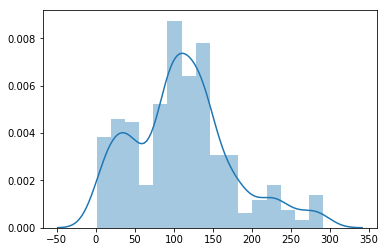

In [167]:
x = np.random.normal(size=100)
print(df['DMC'].tolist())
sns.distplot(df['DMC'].tolist());

In [168]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [169]:
print("Mean")
print(df.mean())
print("Median")
print(df.median())

Mean
X         4.669246
Y         4.299807
FFMC     90.644681
DMC     110.872340
DC      547.940039
ISI       9.021663
temp     18.889168
RH       44.288201
wind      4.017602
rain      0.021663
area     12.847292
dtype: float64
Median
X         4.00
Y         4.00
FFMC     91.60
DMC     108.30
DC      664.20
ISI       8.40
temp     19.30
RH       42.00
wind      4.00
rain      0.00
area      0.52
dtype: float64


In [170]:
def getQuantileRange(df, col):
    for quantile in np.arange(1, 0.89, -0.01):
        maxQuantile = df[col].quantile(quantile)
        df2 = df[df[col] <= maxQuantile]
        print(df2[col].median() - df2[col].mean(), maxQuantile)
getQuantileRange(df, 'DMC')

-2.5723404255319195 291.3
-0.47201565557730873 286.83199999999994
0.9003952569170082 275.5
0.31956087824352153 258.53999999999985
0.6157999999999788 248.40000000000003
3.038223140495859 231.09999999999997
1.269715447154482 231.1
3.1752598752598686 222.4
3.301467505241078 217.7
4.293446088794937 207.0
6.022150537634417 195.17999999999995


#### From the difference, we can deduce that for quantile = 0.97, difference between mean and median is minimum

In [171]:
def reduceByQuantile(df, col, quantile):
    maxQuantile = df[col].quantile(quantile)
    df2 = df[df[col] <= maxQuantile]
    print(df2[col].median() - df2[col].mean(), maxQuantile)
    return df2
df2 = reduceByQuantile(df, 'DMC', 0.97)

0.31956087824352153 258.53999999999985


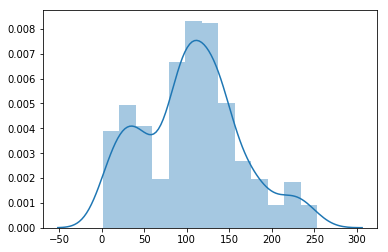

In [172]:
sns.distplot(df2['DMC'].tolist());

In [173]:
getQuantileRange(df2, 'area')

-12.49624750499002 1090.84
-7.577217741935485 196.48
-6.083869653767821 103.39
-5.351049382716049 71.3
-4.922661122661123 56.04
-4.425903361344538 48.55
-4.001592356687898 39.35
-3.6380686695278968 35.88
-3.31767895878525 30.32
-2.9745274725274733 28.659999999999947
-2.7095777777777776 25.99999999999993


In [174]:
df3 = reduceByQuantile(df2,'area' , .85)

-1.8699295774647888 12.1


In [175]:
df3.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,4.593897,4.298122,90.543662,104.469249,534.464085,9.088498,18.838732,44.206573,3.953521,0.026291,1.869930
std,2.307402,1.252892,5.942059,57.084358,248.473157,4.682301,5.749666,16.134860,1.773929,0.325921,3.039159
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,56.700000,423.400000,6.425000,15.425000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.700000,104.200000,654.100000,8.500000,19.200000,41.000000,4.000000,0.000000,0.000000
75%,6.000000,5.000000,92.900000,137.000000,706.400000,11.000000,22.800000,53.000000,5.275000,0.000000,2.545000
max,9.000000,9.000000,96.200000,253.600000,822.800000,56.100000,32.600000,100.000000,9.400000,6.400000,12.100000


In [155]:
def splitNcalc(df, col, bins, labels):
    df2[col] = pd.cut(df[col].tolist(), bins=bins, labels=labels)
    return df2

In [176]:
df4 = splitNcalc(df3, 'rain', 3, labels=["low", "moderate", "high"])

C:\ProgramData\Miniconda3\envs\exp1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [177]:
df4

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,low,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,low,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,low,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,low,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,low,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,low,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,low,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,low,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,low,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,low,0.00
